# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [2]:
import pandas as pd
dataset = pd.read_csv('https://data.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD')
print('In the dataset the total number of rows were',dataset.shape[0],'and total number columns',dataset.shape[1])

<ipython-input-2-7754faf3633c>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('https://data.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD')


In the dataset the total number of rows were 1185676 and total number columns 34


In [51]:
cvd = dataset[dataset['Topic'] == 'Cardiovascular Disease']   ## Here we are going to extract data of cardiovascular disorder patients only.
print('In the dataset the total number of rows were',cvd.shape[0],'and total number columns',cvd.shape[1])

In the dataset the total number of rows were 157750 and total number columns 34


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [52]:
def Unique_count_calculator(dataset_name):
  """('pandas.core.frame.DataFrame') -> pandas.core.frame.DataFrame
  1. Here I will create a variable for columns and loaded the columns in it. and create an empty dataset for unique counts of the columns.
  2. Here I am creating a for loop considering columns as columns, using the column I am accessing each column in my dataset and finding its unique counts.
  3. Here I created a empty dictionary to create a data frame. I want to create it in the form of JSON format. So I created the key as column names and value as as the appended lists.
  4. Then I am creating a data frame into a variable
  """
# 1
  columns = dataset_name.columns
  unique_count = []
# 2
  for column in columns:
    unique_count.append(dataset_name[column].nunique())
# 3
  data_frame = {}
  data_frame['dataset_column'] = columns
  data_frame['unique_count'] = unique_count
# 4
  data = pd.DataFrame(data_frame)
  data = data.sort_values(by = 'unique_count', ascending = False).reset_index()
  del data['index']
# 5
  return data
Unique_count_calculator(cvd)


,dataset_column,unique_count
0,DataValue,16922
1,DataValueAlt,16107
2,HighConfidenceLimit,7164
3,LowConfidenceLimit,6693
4,LocationAbbr,55
5,LocationDesc,55
6,LocationID,55
7,GeoLocation,54
8,QuestionID,18
9,Question,18


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [53]:
def del_columns(dataset_name):
  Unique_Count = Unique_count_calculator(dataset_name)
  Unique_Count
  Unique_Count = Unique_Count[Unique_Count['unique_count']<=1]
  columns = list(Unique_Count['dataset_column'])
  for column in columns:
    del dataset_name[column]
  return dataset_name
pd.options.display.max_columns=30
cvd = del_columns(cvd)
del cvd['DataValueAlt']
cvd

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,DataValueUnit,DataValueType,DataValue,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2010,2010,OR,Oregon,NVSS,Mortality from heart failure,NaN,Number,30,NaN,NaN,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native,POINT (-120.15503132599969 44.56744942400047),41,CVD1_4,NMBR,RACE,AIAN
104,2013,2013,IN,Indiana,NVSS,Mortality from heart failure,"cases per 100,000",Crude Rate,113.1,NaN,NaN,109.4,116.8,Gender,Male,POINT (-86.14996019399968 39.766910452000445),18,CVD1_4,CRDRATE,GENDER,GENM
1196,2017,2017,CA,California,NVSS,Mortality from heart failure,NaN,Number,17441,NaN,NaN,NaN,NaN,Gender,Female,POINT (-120.99999953799971 37.63864012300047),6,CVD1_4,NMBR,GENDER,GENF
1202,2010,2010,OK,Oklahoma,NVSS,Mortality from coronary heart disease,"cases per 100,000",Crude Rate,148.4,NaN,NaN,142.9,153.9,Gender,Female,POINT (-97.52107021399968 35.47203135600046),40,CVD1_3,CRDRATE,GENDER,GENF
1209,2020,2020,OK,Oklahoma,NVSS,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,164.8,NaN,NaN,148.4,181.2,Race/Ethnicity,"Black, non-Hispanic",POINT (-97.52107021399968 35.47203135600046),40,CVD1_4,AGEADJRATE,RACE,BLK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185477,2020,2020,WY,Wyoming,BRFSS,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,CVD10_2,AGEADJPREV,RACE,MRC
1185478,2020,2020,WY,Wyoming,BRFSS,Influenza vaccination among noninstitutionaliz...,%,Age-adjusted Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD9_1,AGEADJPREV,RACE,HIS
1185529,2020,2020,WY,Wyoming,BRFSS,Pneumococcal vaccination among noninstitutiona...,%,Crude Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD10_2,CRDPREV,RACE,HIS
1185637,2020,2020,WY,Wyoming,BRFSS,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD9_2,CRDPREV,RACE,HIS


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [54]:
import numpy as np
cvd['avg_confidence'] = (cvd['HighConfidenceLimit'] + cvd['LowConfidenceLimit'])/2

<ipython-input-54-01a1ba23e47b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd['avg_confidence'] = (cvd['HighConfidenceLimit'] + cvd['LowConfidenceLimit'])/2


In [55]:
cvd = cvd[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
        'HighConfidenceLimit','avg_confidence', 'StratificationCategory1', 'Stratification1',
       'GeoLocation', 'LocationID', 'QuestionID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1']]
cvd

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,DataValueUnit,DataValueType,DataValue,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,avg_confidence,StratificationCategory1,Stratification1,GeoLocation,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2010,2010,OR,Oregon,NVSS,Mortality from heart failure,NaN,Number,30,NaN,NaN,NaN,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native,POINT (-120.15503132599969 44.56744942400047),41,CVD1_4,NMBR,RACE,AIAN
104,2013,2013,IN,Indiana,NVSS,Mortality from heart failure,"cases per 100,000",Crude Rate,113.1,NaN,NaN,109.4,116.8,113.1,Gender,Male,POINT (-86.14996019399968 39.766910452000445),18,CVD1_4,CRDRATE,GENDER,GENM
1196,2017,2017,CA,California,NVSS,Mortality from heart failure,NaN,Number,17441,NaN,NaN,NaN,NaN,NaN,Gender,Female,POINT (-120.99999953799971 37.63864012300047),6,CVD1_4,NMBR,GENDER,GENF
1202,2010,2010,OK,Oklahoma,NVSS,Mortality from coronary heart disease,"cases per 100,000",Crude Rate,148.4,NaN,NaN,142.9,153.9,148.4,Gender,Female,POINT (-97.52107021399968 35.47203135600046),40,CVD1_3,CRDRATE,GENDER,GENF
1209,2020,2020,OK,Oklahoma,NVSS,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,164.8,NaN,NaN,148.4,181.2,164.8,Race/Ethnicity,"Black, non-Hispanic",POINT (-97.52107021399968 35.47203135600046),40,CVD1_4,AGEADJRATE,RACE,BLK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185477,2020,2020,WY,Wyoming,BRFSS,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,NaN,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,CVD10_2,AGEADJPREV,RACE,MRC
1185478,2020,2020,WY,Wyoming,BRFSS,Influenza vaccination among noninstitutionaliz...,%,Age-adjusted Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD9_1,AGEADJPREV,RACE,HIS
1185529,2020,2020,WY,Wyoming,BRFSS,Pneumococcal vaccination among noninstitutiona...,%,Crude Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD10_2,CRDPREV,RACE,HIS
1185637,2020,2020,WY,Wyoming,BRFSS,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD9_2,CRDPREV,RACE,HIS


(array([3.6514e+04, 3.0896e+04, 8.0210e+03, 4.6520e+03, 3.6190e+03,
        2.5720e+03, 1.3460e+03, 5.5400e+02, 1.2500e+02, 2.1000e+01]),
 array([1.80000e-01, 4.62770e+01, 9.23740e+01, 1.38471e+02, 1.84568e+02,
        2.30665e+02, 2.76762e+02, 3.22859e+02, 3.68956e+02, 4.15053e+02,
        4.61150e+02]),
 <BarContainer object of 10 artists>)

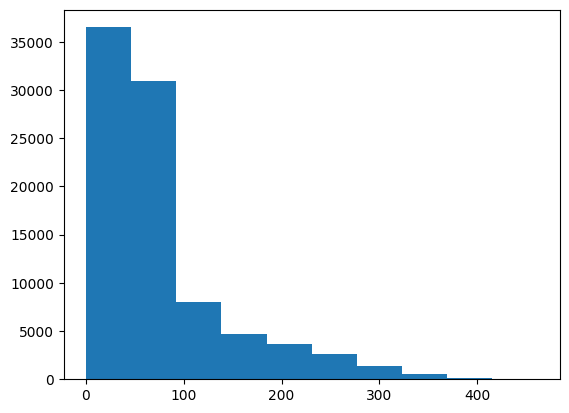

In [60]:
import matplotlib.pyplot as plt
plt.hist(cvd['avg_confidence'])
plt.title

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

array([<Axes: title={'center': 'YearStart'}>,
       <Axes: title={'center': 'YearEnd'}>], dtype=object)

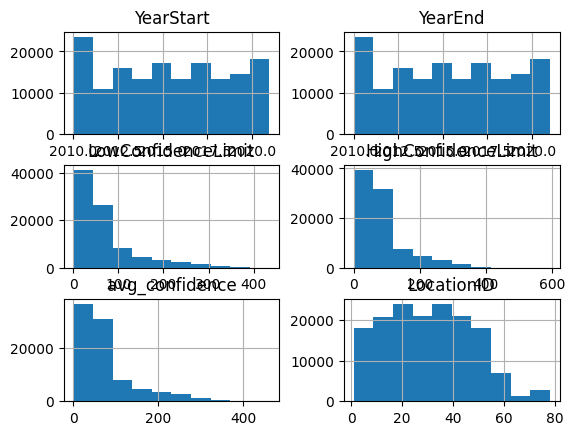

In [66]:
cvd.hist()



---



## Submitting Your Work

Submit your work as usual.